In [1]:
#classifying personal income
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#partitioning the data into train and test set
from sklearn.model_selection import train_test_split

In [3]:
#importing library for logistic regression
from sklearn.linear_model import LogisticRegression

In [4]:
#importing performance metrics, accuracy score and confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix

In [5]:
#importing the data 
data_income = pd.read_csv(r"C:\Users\sahil\Desktop\College Study Material BCA(Analytics)(semester wise)\Nptel (Python for data science)\income(1).csv")
#creating a copy of the data
data = data_income.copy()

In [6]:
#exploratory data analysis
#1. getting to know the data
#2. Data perprocessing(missing values)
#3. cross table and data visualization
#checking the variable data type
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
None


In [8]:
#checking for any missing values
data.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [9]:
# summary of numerical variables
summary_num = data.describe()
print(summary_num)

                age   capitalgain   capitalloss  hoursperweek
count  31978.000000  31978.000000  31978.000000  31978.000000
mean      38.579023   1064.360623     86.739352     40.417850
std       13.662085   7298.596271    401.594301     12.345285
min       17.000000      0.000000      0.000000      1.000000
25%       28.000000      0.000000      0.000000     40.000000
50%       37.000000      0.000000      0.000000     40.000000
75%       48.000000      0.000000      0.000000     45.000000
max       90.000000  99999.000000   4356.000000     99.000000


In [10]:
#summary of categorical variables
summary_cate = data.describe(include='O')
print(summary_cate)

         JobType    EdType        maritalstatus       occupation relationship  \
count      31978     31978                31978            31978        31978   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22286     10368                14692             4038        12947   

          race gender   nativecountry                        SalStat  
count    31978  31978           31978                          31978  
unique       5      2              41                              2  
top      White   Male   United-States   less than or equal to 50,000  
freq     27430  21370           29170                          24283  


In [13]:
#getting the frequencies of each categories
data['JobType'].value_counts()

JobType
 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [14]:
data['occupation'].value_counts()

occupation
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: count, dtype: int64

In [15]:
#checking for unique classes
print(np.unique(data['JobType']))

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']


In [16]:
print(np.unique(data['occupation']))

[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


In [17]:
data = pd.read_csv(r"C:\Users\sahil\Desktop\College Study Material BCA(Analytics)(semester wise)\Nptel (Python for data science)\income(1).csv",na_values=[" ?"])

In [ ]:
#Data preprocessing

In [18]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [19]:
missing = data[data.isnull().any(axis=1)]

In [20]:
print(missing)

       age JobType         EdType        maritalstatus occupation  \
8       17     NaN           11th        Never-married        NaN   
17      32     NaN   Some-college   Married-civ-spouse        NaN   
29      22     NaN   Some-college        Never-married        NaN   
42      52     NaN           12th        Never-married        NaN   
44      63     NaN        1st-4th   Married-civ-spouse        NaN   
...    ...     ...            ...                  ...        ...   
31892   59     NaN      Bachelors   Married-civ-spouse        NaN   
31934   20     NaN        HS-grad        Never-married        NaN   
31945   28     NaN   Some-college   Married-civ-spouse        NaN   
31967   80     NaN        HS-grad              Widowed        NaN   
31968   17     NaN           11th        Never-married        NaN   

          relationship    race   gender  capitalgain  capitalloss  \
8            Own-child   White   Female            0            0   
17             Husband   White   

In [67]:
#removing all the data with missing values
data2 = data.dropna(axis=0)
data3 = data2.copy()
data4 = data3.copy()

In [26]:
#cross table & data validation
#extracting the columns names
data2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [27]:
#gender proportion table
gender = pd.crosstab( index = data2['gender'],
                     columns = 'count',
                     normalize = True )
print(gender)

col_0       count
gender           
 Female  0.324315
 Male    0.675685


In [28]:
#checking the variation of salaries across genders
#gender v/s salary status:
gender_salstat = pd.crosstab(index = data2['gender'],
                             columns = data2['SalStat'],
                             margins = True ,
                             normalize = 'index' )
print(gender_salstat)

SalStat   greater than 50,000   less than or equal to 50,000
gender                                                      
 Female              0.113678                       0.886322
 Male                0.313837                       0.686163
All                  0.248922                       0.751078


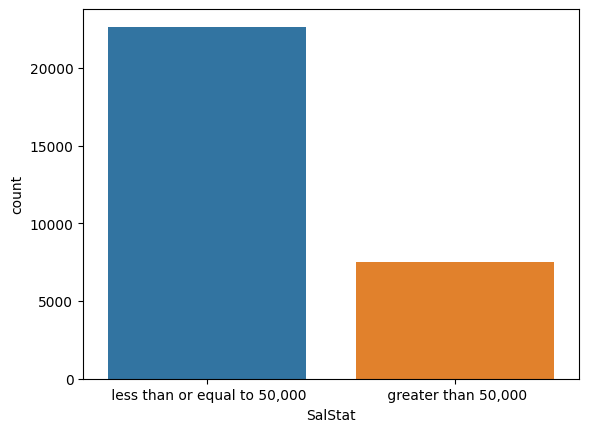

In [42]:
#visualization of frequency distribution of salary status :
SalStat = sns.countplot(x= data2['SalStat'],data= data2)


In [ ]:
# 75 % of people's salary status is <=50,000 & 25% of people's salary status is > 50,000


C:\Users\sahil\AppData\Local\Temp\ipykernel_23516\2195577657.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2['age'], bins=10, kde=False)


<Axes: xlabel='age'>

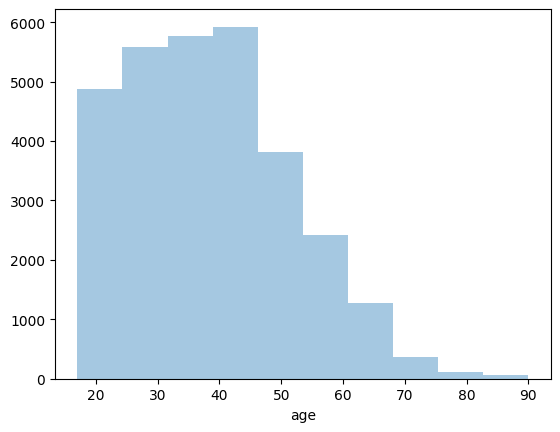

In [52]:
#plotting histogram of age variable
sns.distplot(data2['age'], bins=10, kde=False)
# People with age 20-45 age are high in frequency

SalStat
 greater than 50,000             43.0
 less than or equal to 50,000    34.0
Name: age, dtype: float64

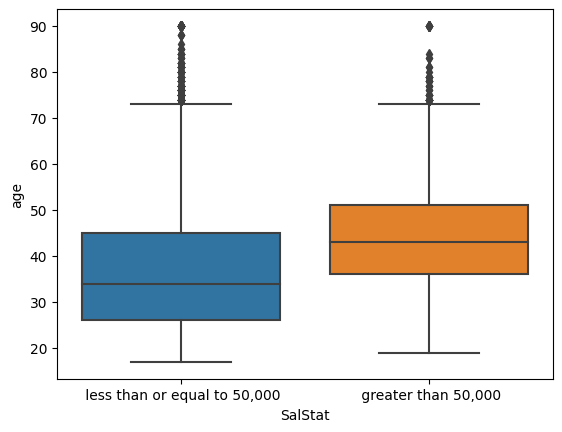

In [58]:
# Box Plot - Age vs Salary status 
sns.boxplot(x='SalStat', y='age', data=data2)
data2.groupby('SalStat')['age'].median()

# people with 35-50 age are more likely to earn > 50000 USD p.a
# people with 25-35 age are more likely to earn <= 50000 USD p.a


SalStat,"greater than 50,000","less than or equal to 50,000"
JobType,,
Federal-gov,38.7,61.3
Local-gov,29.5,70.5
Private,21.9,78.1
Self-emp-inc,55.9,44.1
Self-emp-not-inc,28.6,71.4
State-gov,26.9,73.1
Without-pay,0.0,100.0
All,24.9,75.1


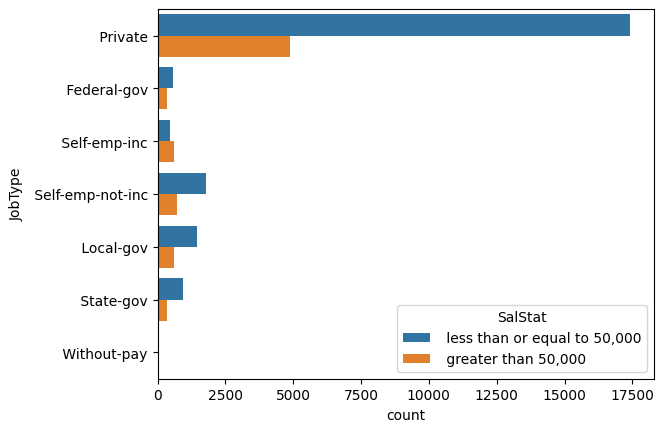

In [59]:
# Jobtype
JobType     = sns.countplot(y=data2['JobType'],hue = 'SalStat', data=data2)
job_salstat =pd.crosstab(index = data2["JobType"],columns = data2['SalStat'], margins = True, normalize =  'index')  
round(job_salstat*100,1)


SalStat,"greater than 50,000","less than or equal to 50,000"
EdType,,
10th,7.2,92.8
11th,5.6,94.4
12th,7.7,92.3
1st-4th,4.0,96.0
5th-6th,4.2,95.8
7th-8th,6.3,93.7
9th,5.5,94.5
Assoc-acdm,25.4,74.6
Assoc-voc,26.3,73.7


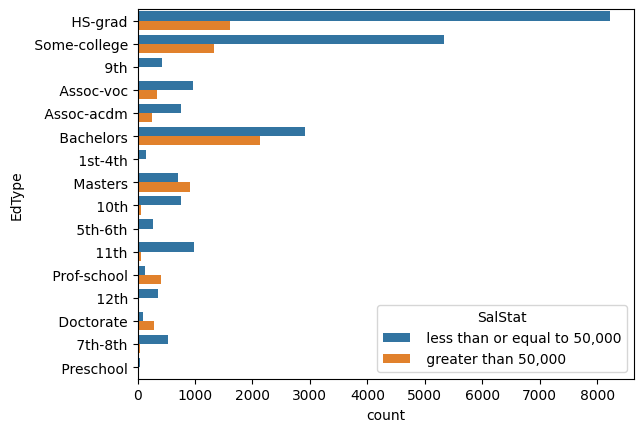

In [60]:
# Education
Education   = sns.countplot(y=data2['EdType'],hue = 'SalStat', data=data2)
EdType_salstat = pd.crosstab(index = data2["EdType"], columns = data2['SalStat'],margins = True,normalize ='index')  
round(EdType_salstat*100,1)


SalStat,"greater than 50,000","less than or equal to 50,000"
occupation,,
Adm-clerical,13.4,86.6
Armed-Forces,11.1,88.9
Craft-repair,22.5,77.5
Exec-managerial,48.5,51.5
Farming-fishing,11.6,88.4
Handlers-cleaners,6.1,93.9
Machine-op-inspct,12.5,87.5
Other-service,4.1,95.9
Priv-house-serv,0.7,99.3


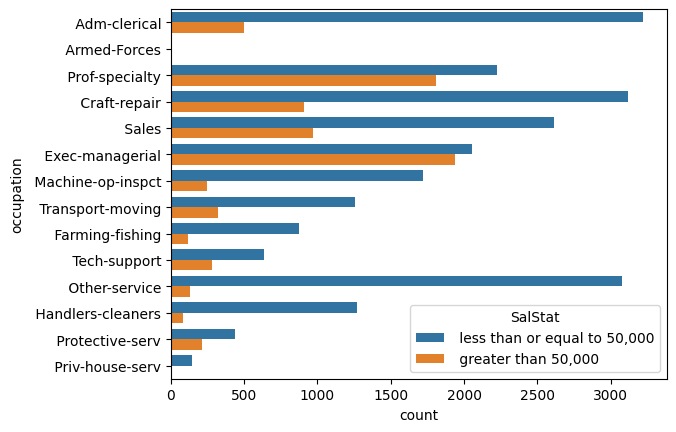

In [61]:
# Occupation
Occupation  = sns.countplot(y=data2['occupation'],hue = 'SalStat', data=data2)
occ_salstat = pd.crosstab(index = data2["occupation"], columns =data2['SalStat'],margins = True,normalize = 'index')  
round(occ_salstat*100,1)

C:\Users\sahil\AppData\Local\Temp\ipykernel_23516\2267995637.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2['capitalgain'], bins = 10, kde = False)


<Axes: xlabel='capitalgain'>

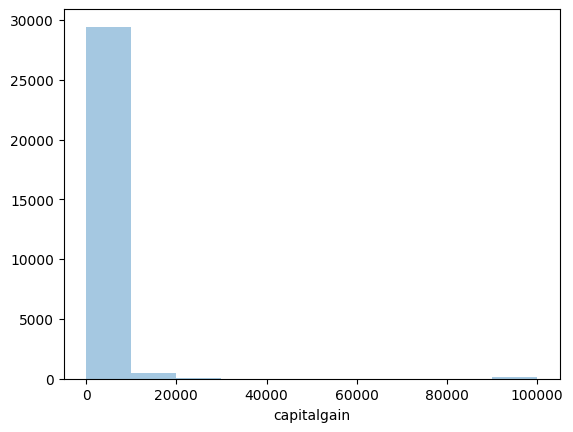

In [63]:
# Capital gain
sns.distplot(data2['capitalgain'], bins = 10, kde = False)


C:\Users\sahil\AppData\Local\Temp\ipykernel_23516\3483189112.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2['capitalloss'], bins = 10, kde = False)


<Axes: xlabel='capitalloss'>

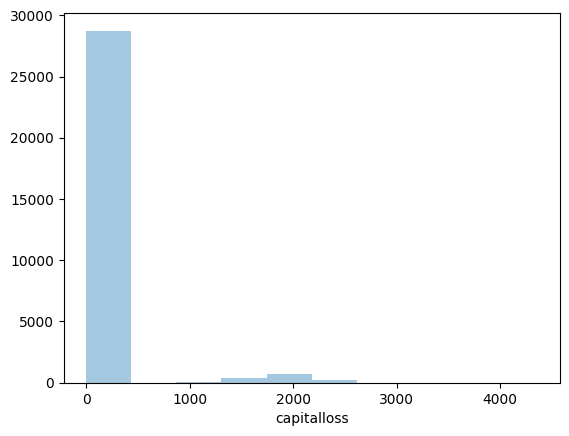

In [64]:
sns.distplot(data2['capitalloss'], bins = 10, kde = False)

In [68]:
#Logistic regression
# Reindexing the salary status names to 0,1
data3['SalStat']=data3['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
print(data3['SalStat'])

cols = ['gender','nativecountry','race','JobType']
new_data = data3.drop(cols,axis = 1)

new_data=pd.get_dummies(new_data, drop_first=True)

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64


In [69]:
# Storing the column names 
columns_list2=list(new_data.columns)
print(columns_list2)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-serv', 'occupation_ Sales', 'occupation_ Tech-support', 'occupation_ Transport-moving', 'relationship_ Not-in-family', 'relationship_ Other-rel

In [70]:
# Separating the input names from data
features2=list(set(columns_list2)-set(['SalStat']))
print(features2)


['occupation_ Armed-Forces', 'EdType_ Some-college', 'relationship_ Other-relative', 'maritalstatus_ Never-married', 'EdType_ 7th-8th', 'occupation_ Tech-support', 'EdType_ 5th-6th', 'relationship_ Wife', 'occupation_ Handlers-cleaners', 'EdType_ Assoc-voc', 'occupation_ Machine-op-inspct', 'relationship_ Own-child', 'EdType_ 9th', 'occupation_ Prof-specialty', 'occupation_ Craft-repair', 'capitalgain', 'maritalstatus_ Married-civ-spouse', 'relationship_ Not-in-family', 'EdType_ 12th', 'maritalstatus_ Married-spouse-absent', 'occupation_ Transport-moving', 'capitalloss', 'EdType_ Doctorate', 'occupation_ Protective-serv', 'EdType_ HS-grad', 'occupation_ Other-service', 'EdType_ Masters', 'occupation_ Priv-house-serv', 'EdType_ Prof-school', 'maritalstatus_ Separated', 'occupation_ Exec-managerial', 'occupation_ Sales', 'EdType_ 1st-4th', 'EdType_ Assoc-acdm', 'EdType_ 11th', 'EdType_ Bachelors', 'EdType_ Preschool', 'maritalstatus_ Widowed', 'occupation_ Farming-fishing', 'hoursperweek

In [71]:
# Storing the output values in y
y2=new_data['SalStat'].values
print(y2)

[0 0 1 ... 0 0 0]


In [72]:
# Storing the values from input features
x2 = new_data[features2].values
print(x2)

[[False False False ... 45 False False]
 [True False False ... 24 False False]
 [False True False ... 44 False False]
 ...
 [False True False ... 23 False False]
 [False True False ... 42 False False]
 [False False False ... 29 False False]]


In [73]:
# Splitting the data into train and test
train_x2,test_x2,train_y2,test_y2 = train_test_split(x2,y2,test_size=0.3, random_state=0)

In [74]:
# Make an instance of the Model and fitting x &y
logistic2 = LogisticRegression()
logistic2.fit(train_x2,train_y2)

C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [78]:
# Prediction from test data
prediction2 = logistic2.predict(test_x2)

[0 0 0 ... 0 0 0]


In [76]:
# Printing the misclassified values from prediction
print('Misclassified samples: %d' % (test_y2 != prediction2).sum())


Misclassified samples: 1501
